In [146]:
import numpy as np
import sympy as sp

In [147]:
t1,p1,t2,p2=sp.symbols('\\theta_1 \\phi_1 \\theta_2 \\phi_2') # For latex
x1,y1,z1=sp.cos(p1)*sp.sin(t1),sp.sin(p1)*sp.sin(t1),sp.cos(t1)
x2,y2,z2=sp.cos(p2)*sp.sin(t2),sp.sin(p2)*sp.sin(t2),sp.cos(t2)


from sympy.vector import CoordSys3D
N = CoordSys3D('N')
d1=x1*N.i+y1*N.j+z1*N.k
d2=x2*N.i+y2*N.j+z2*N.k

In [148]:
Ux_symbolic=(d1.dot(d2)-3*d1.dot(N.i)*d2.dot(N.i)).simplify()
Uy_symbolic=(d1.dot(d2)-3*d1.dot(N.j)*d2.dot(N.j)).simplify()
Uz_symbolic=(d1.dot(d2)-3*d1.dot(N.k)*d2.dot(N.k)).simplify()
sp.init_printing()
Ux_symbolic,Uy_symbolic,Uz_symbolic

 ## U is a 5-tensor

$U_{i,jk,lm}$ 
- i - axis of spin 1 and 2 relative to crystal coordinates $(x,y,z)$
- j,k - ($\theta_1,\phi_1$) components of spin 1 relative to crystal coordinates
- l,m - ($\theta_2,\phi_2$) components of spin 2 relative to crystal coordinates

In [149]:
def create_spehircal_mesh_points(n):
    t=np.linspace(0,2*np.pi,n)
    p=np.linspace(0,np.pi,n)
    return np.meshgrid(t,p)

nk=31
points=create_spehircal_mesh_points(nk)

In [150]:
import matplotlib.pyplot as plt

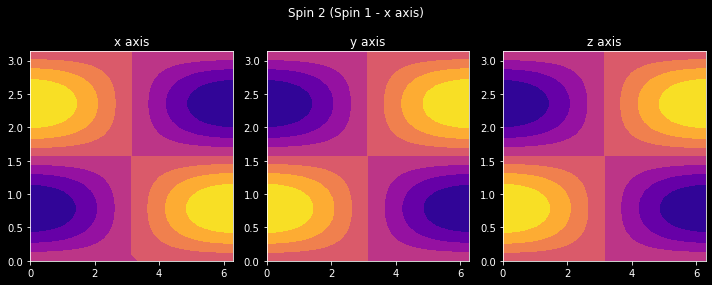

In [151]:

P1={t1:sp.pi/2,p1:0} #Spin 1 pointing along x axis

Ux=sp.lambdify((t2,p2),Ux_symbolic.subs(P1))
Uy=sp.lambdify((t2,p2),Uy_symbolic.subs(P1))
Uz=sp.lambdify((t2,p2),Uz_symbolic.subs(P1))

fig,ax=plt.subplots(1,3,figsize=(10,4))

ax[0].contourf(*points,np.array([Ux(i,j) for i,j in zip(*points)]).reshape(nk,nk).T,cmap="plasma")
ax[1].contourf(*points,np.array([Uy(i,j) for i,j in zip(*points)]).reshape(nk,nk).T,cmap="plasma")
ax[2].contourf(*points,np.array([Uz(i,j) for i,j in zip(*points)]).reshape(nk,nk).T,cmap="plasma")

fig.suptitle("Spin 2 (Spin 1 - x axis)")

for j,i in enumerate(ax):i.set_title("{axis} axis".format(axis=["x","y","z"][j]))
plt.tight_layout()

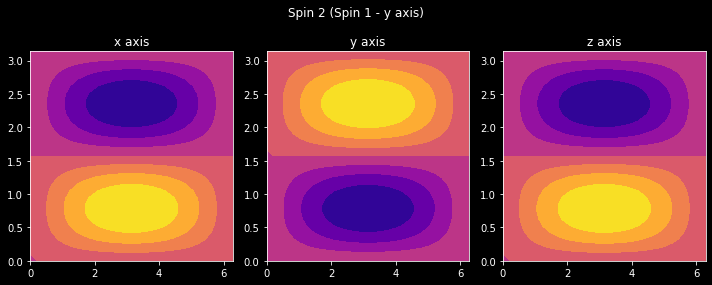

In [152]:

P1={t1:sp.pi/2,p1:sp.pi/2} #Spin 1 pointing along y axis

Ux=sp.lambdify((t2,p2),Ux_symbolic.subs(P1))
Uy=sp.lambdify((t2,p2),Uy_symbolic.subs(P1))
Uz=sp.lambdify((t2,p2),Uz_symbolic.subs(P1))

fig,ax=plt.subplots(1,3,figsize=(10,4))

ax[0].contourf(*points,np.array([Ux(i,j) for i,j in zip(*points)]).reshape(nk,nk).T,cmap="plasma")
ax[1].contourf(*points,np.array([Uy(i,j) for i,j in zip(*points)]).reshape(nk,nk).T,cmap="plasma")
ax[2].contourf(*points,np.array([Uz(i,j) for i,j in zip(*points)]).reshape(nk,nk).T,cmap="plasma")

fig.suptitle("Spin 2 (Spin 1 - y axis)")

for j,i in enumerate(ax):i.set_title("{axis} axis".format(axis=["x","y","z"][j]))
plt.tight_layout()

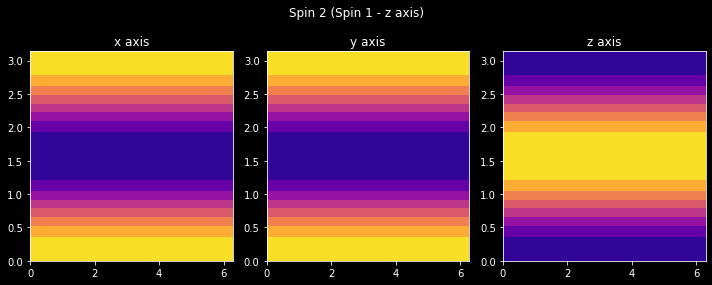

In [153]:

P1={t1:0,p1:0} #Spin 1 pointing along z axis

Ux=sp.lambdify((t2,p2),Ux_symbolic.subs(P1))
Uy=sp.lambdify((t2,p2),Uy_symbolic.subs(P1))
Uz=sp.lambdify((t2,p2),Uz_symbolic.subs(P1))

fig,ax=plt.subplots(1,3,figsize=(10,4))

ax[0].contourf(*points,np.array([Ux(i,j) for i,j in zip(*points)]).reshape(nk,nk).T,cmap="plasma")
ax[1].contourf(*points,np.array([Uy(i,j) for i,j in zip(*points)]).reshape(nk,nk).T,cmap="plasma")
ax[2].contourf(*points,np.array([Uz(i,j) for i,j in zip(*points)]).reshape(nk,nk).T,cmap="plasma")

fig.suptitle("Spin 2 (Spin 1 - z axis)")

for j,i in enumerate(ax):i.set_title("{axis} axis".format(axis=["x","y","z"][j]))
plt.tight_layout()

/Users/santy/miniconda3/envs/dft/lib/python3.7/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.


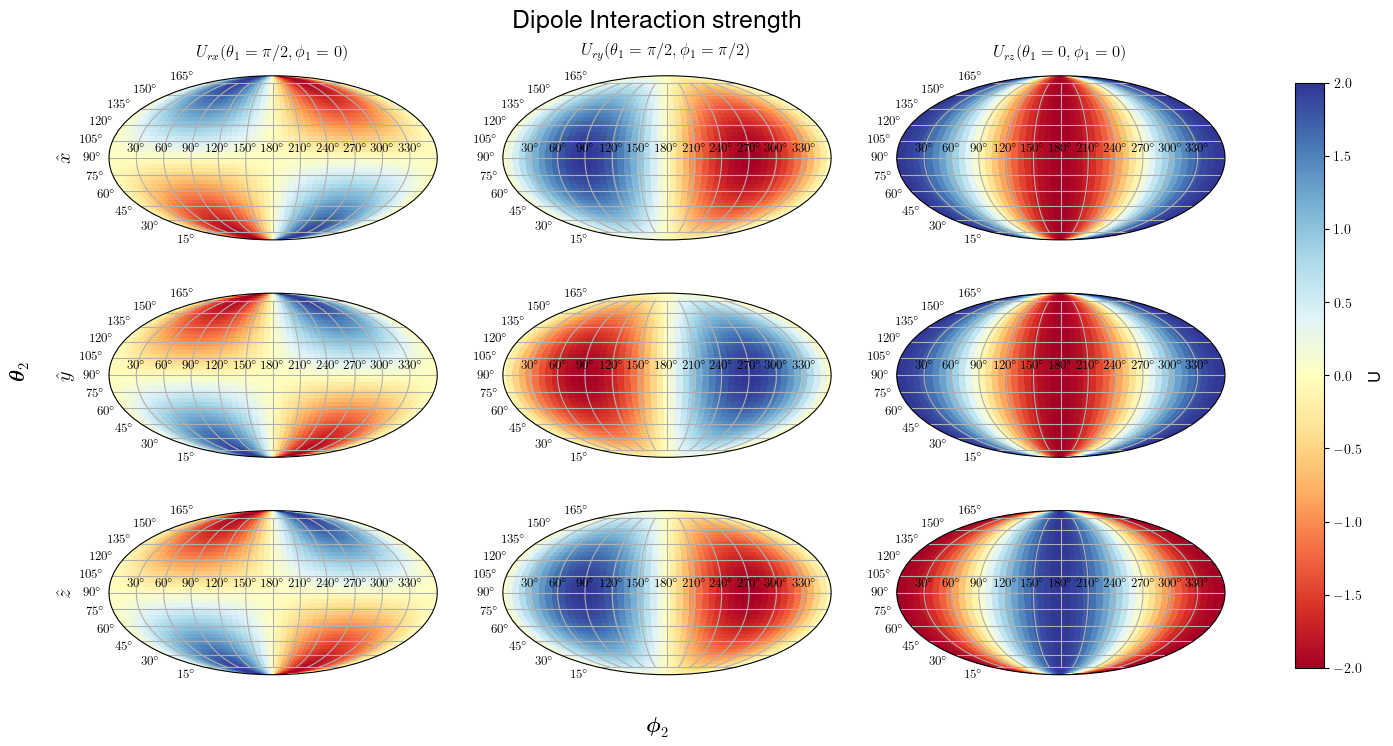

In [185]:
import matplotlib
plt.style.use("default")
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})


Ps=[{t1:sp.pi/2,p1:0} ,
    {t1:sp.pi/2,p1:sp.pi/2},
    {t1:0,p1:0}]
Us_symbolic=[Ux_symbolic,Uy_symbolic,Uz_symbolic]
nk=51
points=create_spehircal_mesh_points(nk)



l=0;k=0
names=["$U_{rx}(\\theta_1=\\pi/2,\\phi_1=0)$",
       "$U_{ry}(\\theta_1=\\pi/2,\\phi_1=\\pi/2)$",
       "$U_{rz}(\\theta_1=0,\\phi_1=0)$"]
y_names=["$\hat{x}$","$\hat{y}$","$\hat{z}$"]
fig, ax = plt.subplots(3,3,subplot_kw=dict(projection='mollweide'), figsize=(18,8))


import itertools
for P,U in itertools.product(Ps,Us_symbolic):
    U_tmp=sp.lambdify((t2,p2),U.subs(P))
    data=np.array([U_tmp(i,j) for i,j in zip(*points)]).reshape(nk,nk)
    ax[0][l].set_title(names[l], pad=14)
    x = np.linspace(-np.pi, np.pi, nk)
    y = np.linspace(-np.pi/2, np.pi/2, nk)
    X, Y = np.meshgrid(x, y)
    # matplotlib.rc('text', usetex=True)
    matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
    xlabels = ['$30^\circ$', '$60^\circ$','$90^\circ$','$120^\circ$','$150^\circ$',
                '$180^\circ$', '$210^\circ$', '$240^\circ$', '$270^\circ$','$300^\circ$', '$330^\circ$']

    ylabels = ['$165^\circ$', '$150^\circ$', '$135^\circ$', '$120^\circ$', 
                '$105^\circ$', '$90^\circ$', '$75^\circ$', '$60^\circ$',
                '$45^\circ$','$30^\circ$','$15^\circ$']
    ylabels.reverse()
    ax[k][0].set_ylabel(y_names[k],fontsize=15)
    im = ax[k][l].pcolormesh(X, Y , data,cmap="RdYlBu",shading='auto')
    ax[k][l].set_xticklabels(xlabels, fontsize=9)
    ax[k][l].set_yticklabels(ylabels, fontsize=9)
    #ax[k][l].set_title('Nearest Neibghor - $U$', fontsize=20)
    #ax[k][l].set_xlabel(r'$\boldsymbol \phi$', fontsize=15)
    #ax[k][l].set_ylabel(r'$\boldsymbol{\theta}$', fontsize=15)
    ax[k][l].grid()
    k=k+1
    if k>2:
        l=l+1
        k=0

fig.colorbar(im,orientation='vertical',ax=ax.ravel().tolist(), shrink=0.95).set_label(label="U",size=12,weight='bold')  

fig.text(0.35, .93,'Dipole Interaction strength',fontsize=18)
fig.text(0.43, 0.05, r"$\boldsymbol \phi_2$",fontsize=15, ha='center')
fig.text(.07, 0.5, r"$\boldsymbol \theta_2$",fontsize=15, va='center', rotation='vertical')
plt.savefig("../figures/Dipole-Inter_full_molly.png",dpi=300,bbox_inches='tight')
plt.show()